# Trabalho Prático 1 - Algoritmos 2

Alunos:
  - Jean Lucas Almeida Mota
  - João Eduardo da Silva Júnior


#Introdução

O relatório foi dividido nas seguintes partes:

1. Classes auxiliares
  - Implementação das classes usadas no projeto.
2. Leitura e Envoltória Convexa
  - Construir duas envoltórias convexas A e B, para pontos de duas classes distintas.
3. Separabilidade linear
  - Verificar se existe uma separabilidade linear entre as envoltórias A e B, usando o algoritmo da varredura linear.
4. Modelo de classificação
  - Dado que há separabilidade linear entre A e B. Gerar o modelo de classificação a partir da reta perpendicar a reta que liga os pontos mais próximos entre as duas envoltórias
  - O modelo a ser reportado é a equação dessa reta
5. O Classificador
  - Se um ponto estiver abaixo da reta gerada pelo modelo, então ele receberá o mesmo rótulo que os pontos da envoltória dessa região. O mesmo para o ponto acima da reta. Caso o ponto seja colinear com a reta, então o ponto não pertence a nenhuma envoltória.

6. Métricas
  - Avaliar o classificador com base nas métricas:
    - precisão
    - revocação 
    - f1-escore
  - OBS: Foi permitida a computação dessas métricas através da biblioteca Scikit-Learn de Python, ou através de implementação própria com base nas suas definições (verificar entrada na Wikipedia).
  - https://pt.wikipedia.org/wiki/Precisão_e_revocação

8. Experimentos
  - Os testes foram feitos com os datasets encontrados em:
    - https://sci2s.ugr.es/keel/category.php?cat=clas#inicio

9. Conclusão


**Importações usadas**

**pandas:** Usada principalmente no cálculo da envoltória para trabalhar com os datasets de maneira eficiente.

**matplotlib**: Visualização dos pontos e das retas graficamente.

**random**: Usada para gerar pontos aleatórios em testes específicos.

**numpy**: Usado somente para facilitar os cálculos potência e raiz em uma lista de pontos.

**sklearn.metrics**: Usando somente para calcular as métricas pedidas.

In [ ]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
from random import *
import numpy as np
import sklearn.metrics as metric

# Parte 1 -Classes Auxiliares

Para a implementação da Separabilidade Linear e do Modelo de Classificação, foi necessária a implementação das classes Ponto e Reta, a fim de melhor modularizar o projeto.


  

**Classe Ponto:**

É a classe que represanta o objeto ponto do plano cartesiano. Possui os atributos:
  - **x**: Coordenada x do ponto.
  - **y**: Coordanada y do ponto.
  - **tipo**: Identifica se o ponto em questão é ponto inicial ou final de uma reta.

Essa classe não possui funções, uma vez que apenas as operações de menor e igual foram necessárias. Nesse caso, foi usado a sobrecarga de operador lógico.
  - Um ponto é menor que outro se sua coordanada **y** é menor.
  - Um ponto é igual a outro se suas coordedadas **x** e **y** são iguais.



In [ ]:
#Classe Ponto (x,y)
class Ponto:

  #Atributos
  x = None
  y = None
  tipo = None #True para ponto inicial e False para ponto final

  #Funções
  def __init__(self,x,y): #Construtor
    self.x = x
    self.y = y    
  
  def __str__(self): #Função que retorna uma string pra visualizar o ponto
    return "(" + str(self.x) + "," + str(self.y) + ")"
  
  def __eq__(self, outro): #Operador Igual
    return self.x == outro.x and self.y == outro.y
  
  def __lt__(self, outro): #Operador menor
    return self.y < outro.y

**Classe Reta:**

É a classe que representa a reta do plano cartesiado. Para a representar a equação da reta, foi implementada a equação geral da reta: $ax + by + c = 0$. Possui os atributos:
  - **p_i**: Ponto inicial da reta.
  - **p_f**: Ponto final da reta.  
  - **a**: Variavel a da equação geral da reta.
  - **b**: Variavel b da equação geral da reta.
  - **b**: Variavel b da equação geral da reta.
  - **pa**: Variavel a da equação geral da reta perpendicular a reta original.  
  - **pb**: Variavel b da equação geral da reta perpendicular a reta original.  
  - **pc**: Variavel c da equação geral da reta perpendicular a reta original.

A classe reta é inicializada com dois pontos, ela identifica qual é o ponto mais a esquerda, marca o mesmo como ponto inicial e o outro como ponto final. O cálculo da equação da reta ja é efetuado também na inicialização do objeto.

Possui os operadores lógicos:
  - **menor**: Uma reta é menor que a outra se o seu ponto inicial é menor.
  - **igual**: Uma reta é igual a outra se os seus pontos iniciais e finais são iguais.

Possui as funções:

 - **Direction**: Dados $p_0$, $p_1$ e $p_2$ determina a direção entre $p_0p_1$ e $p_0 p_2$
 - **OnSegment**: Dados $p_0$, $p_1$ e $p_2$ determina se $p_0p_1$ e $p_0 p_2$ são colineares.
 - **Intersect**: Verifica se há interceção entre duas retas.
 - **Equacao**: Cálcula os coeficientes $a$, $b$ e $c$ da equação geral da reta.
 - **GetEq**: Retorna uma string com a equação geral da reta.
 - **GetPontos** e **GetPontosPerp**: Ambas retornam os pontos da reta e da reta perpendicular que tocam os eixos, respectivamente.
 - **CalculaPerp**: Cálcula os coeficientes $a$, $b$ e $c$ da equação geral da reta perpendicular.
 - **RetaPerpMediana**: Dado um ponto $p$ cálcula os coeficientes $a$, $b$ e $c$ da equação geral da reta que passa por $p$.
 - **ShowPerp**: Mostra em um gráfico a reta e a reta perpendicular a ela.
 - **PosRelativa**: Dado um ponto verifica se ele está acima, abaixou ou pertence a reta.


 **Complexidade:** Todas as função da classe reta são $O(1)$

In [ ]:
#Classe Reta(ponto_inicial,ponto_final)
class Reta:

  #Atributos
  p_i = None
  p_f = None  
  a = 0
  b = 0
  c = 0
  pa = 0
  pb = 0
  pc = 0

  #Funções
  def __init__(self,pi,pf): #Construtor
    if pi.x <= pf.x: #Confirmando que o ponto inicial é o mais a esquerda
      pi.tipo = True
      pf.tipo = False
      self.p_i = pi
      self.p_f = pf
    else:
      pf.tipo = True
      pi.tipo = False
      self.p_i = pf
      self.p_f = pi
    
    self.a = 0
    self.b = 0
    self.c = 0
    self.pa = 0
    self.pb = 0
    self.pc = 0
    
    self.Equacao()
  
  def __str__(self): #Função que retorna uma string pra visualizar o ponto
    return self.p_i.__str__() + "-" + self.p_f.__str__() 
  
  def __eq__(self, outro):
    if outro == None:
      return False
    return self.p_i == outro.p_i and self.p_f == outro.p_f

  def __lt__(self, outro):
    if outro == None:
          return False
    return self.p_i < outro.p_i
  
  def plot(self): #Gera um gráfico com a reta
    plt.plot([self.p_i.x,self.p_f.x], [self.p_i.y,self.p_f.y], 'bo', linestyle="-")
    plt.text(self.p_i.x, self.p_i.y, self.p_i.__str__())
    plt.text(self.p_f.x, self.p_f.y, self.p_f.__str__())
    
    plt.show()
  
  def Direction(self,p0,p1,p2): #Determina a direção de duas retas com o mesmo ponto inical  
    #(x1-x0)(y2-y0)-(x2-x0)(y1-y0) 
    a = p1.x - p0.x
    b = p2.y - p0.y
    c = p2.x - p0.x
    d = p1.y - p0.y
    return (a*b) - (c*d)

  def OnSegment(self,p0,p1,p2): #Auxiliar da Intercept vista em sala
    if p1.x > p0.x and p1.y > p0.y:      
      if p1.x < p2.x and p1.y < p2.y:
        return True
    elif p2.x > p0.x and p2.y > p0.y:      
      if p2.x < p1.x and p2.y < p1.y:
        return True
    else:
      return False

  def Intersect(self,outra): #Determina se intercepta outra reta
    if outra == None:
      return False
      
    p1 = self.p_i
    p2 = self.p_f
    p3 = outra.p_i
    p4 = outra.p_f

    d1 = self.Direction(p3,p4,p1)
    d2 = self.Direction(p3,p4,p2)
    d3 = self.Direction(p1,p2,p3)
    d4 = self.Direction(p1,p2,p4)

    if(( d1>0 and d2<0 ) or ( d1<0 and d2>0 )) and (( d3>0 and d4<0 ) or ( d3<0 and d4>0)):
      return True
    elif d1 == 0 and self.OnSegment(p3,p4,p1):
      return True
    elif d2 == 0 and self.OnSegment(p3,p4,p2):
      return True
    elif d3 == 0 and self.OnSegment(p1,p2,p3):
      return True
    elif d4 == 0 and self.OnSegment(p1,p2,p4):
      return True
    else:
      return False
    
  def Equacao(self):
    """
    p1(2,-1) p2(1,3)

    X Y
    2 -1
    1 3
    X Y

    ax + by + c = 0
    -> a = -x - 3x
    -> b = y - 2y
    -> c = 6 - (-1)
    """      
    self.a = self.a + self.p_i.y
    self.c = self.c + (self.p_i.x * self.p_f.y)
    self.b = self.b + self.p_f.x

    self.b = self.b - self.p_i.x
    self.c = self.c - (self.p_i.y * self.p_f.x)
    self.a = self.a - self.p_f.y

    self.a = round(self.a,5)
    self.b = round(self.b,5)
    self.c = round(self.c,5)

    if self.a == 0:
     self.a = random()/100      
    if self.b == 0:
     self.b = random()/100      
    if self.c == 0:
     self.c = random()/100      
    

    
  def GetEq(self):
    sa = ''
    sb = ''
    sc = ''
    if self.a > 0:
      sa = '+'
    if self.b > 0:
      sb = '+'
    if self.c > 0:
      sc = '+'
    return str(self.a)+'x '+sb+ str(self.b) + 'y '+sc+ str(self.c) + ' = 0'
  
  def GetEqReduzida(self):
    x = -(self.a/self.b)
    t = -(self.c/self.b)
    x = round(x,5)
    t = round(t,5)

    sc = ''
    if t > 0:
      sc = '+'
    return "y = " + str(x)+"x " + sc + str(t)
  
  def GetPontosPerp(self):    
    if self.pb != 0:
      p1 = Ponto(0,round(-self.pc/self.pb,5)) # x = 0 e y = -c/b      
      return p1
    if self.pa != 0:      
      p1 = Ponto(round(-self.pc/self.pa,5),0) # y = 0 e x = -c/a
      return p1
    else:
      return None
  
  def GetPontos(self):
    p1 = Ponto(0,round(-self.c/self.b,5)) # x = 0 e y = -c/b
    p2 = Ponto(round(-self.c/self.a,5),0) # y = 0 e x = -c/a
    return p1,p2
  
  
  def CalculaPerp(self,p):
    #m = -a/b
    #m' = -b/a
    self.pb = self.a
    self.pa = -self.b
    self.pc = -((self.pa*p.x)+(self.pb*p.y)) # c = -(ax + by)
    #print(str(self.pa)+'x '+ str(self.pb) + 'y '+ str(self.pc) + ' = 0')
   
  def RetaPerpMediana(self):    
    mx = (self.p_i.x + self.p_f.x)/2
    my = (self.p_i.y + self.p_f.y)/2
    mx = round(mx,5)
    my = round(my,5)

    m = Ponto(mx,my)
    self.CalculaPerp(m)
    #print("reta ",self.a," ",self.b," ",self.c)  
    #print("perp ",self.pa," ",self.pb," ",self.pc)    

    #p1 = Ponto(0,round(-self.pc/self.pb,5)) # x = 0 e y = -c/b

    p1 = self.GetPontosPerp()    
    
    reta_perp = Reta(m,p1)
    return reta_perp
  
  def ShowPerp(self):
    
    r = self.RetaPerpMediana()        

    print("reta: ",str(self.a)+'x '+ str(self.b) + 'y '+ str(self.c) + ' = 0')
    print("reta perpendicular: ",str(self.pa)+'x '+ str(self.pb) + 'y '+ str(self.pc) + ' = 0')

    #plt.plot([self.p_i.x,self.p_f.x], [self.p_i.y,self.p_f.y], 'bo', linestyle="-", color = 'blue')
    #plt.plot([r.p_i.x,r.p_f.x], [r.p_i.y,r.p_f.y], 'ro', linestyle="-", color = 'red')

    x = np.linspace(-100,100)    
    plt.plot(x, -(self.a*x/self.b)-(self.c/self.b), linestyle="-", color = 'blue')
    plt.plot(x, -(self.pa*x/self.pb)-(self.pc/self.pb), linestyle="-", color = 'red')    
    #plt.gca().set_aspect('equal')
    plt.axis('equal')
    plt.show()
  
  def PosRelativa(self,p): # Dado um ponto verifica se ele esta acima ou abaixo da reta
    ra = self.a * p.x
    rb = self.b * p.y
    result = ra + rb + self.c

    return result


#Parte 2 - Leitura e Envoltória Convexa

A Leitura e calculo da envoltória convexa retira os dados do dataset passado por endereço, monta dataframes com esses dados, separa os dados das classes que serão usadas e divide 70% para ajustar o modelo e 30% para avaliar o modelo criado. Nos 70%, é realizado cálculos para computar a envoltória convéxa de cada uma das duas classes analisadas e é computado o Algoritmo de Gift Wrapping para achar a envoltória de cada classe.
Para alcançar os objetivos dessa parte, foram utilizadas as seguintes funções:
1. lendoDataSet
  - Recebe um endereço com um data set
  - Calcula onde se inicia a leitura dos dados e qual a coluna das classes
  - retorna um dataset com todas as informações lidas, um dataset só com as linhas que contém os dados que serão tratados e o numero que é a quantidade de linhas retiradas do dataset que só tem os dados
  - Função O(n)
2. dataFrameTratado
  - Recebe como parâmetro um DataFrame o numero de linhas de instrições nos sataset original, que é usado para achar a coluna que contém as classes, e qual classe está sendo trabalhada
  - Trata o dataset, dando nomes às colunas e especificando a classe será tratada
  - Separa os 70% dos exemplos que serão usados para fazer a envoltória dos 30% que serão usados para avaliar o modelo
  - Escolhe o ponto pivô,  que é o de menor y mais à esquerda, e centra a nuvem de pontos de forma que o ponto pivê fique em x=0 e y=0
  - Calcula a norma e o x e y unitário, para verificar o ângulo dos pontos em relação ao ponto pivô
  - Retira pontos redundantes, 
    - Tanto aqueles que tem o mesmo x e y, pois são irrelevantes para calcular a envoltória
    - Quanto aqueles que tem x unitário iguais, mas que têm o y menor que outro ponto, pois significa a existência de outro ponto com o mesmo ângulo que esse, mas que está mais distante. Portanto o ponto retirado não precisa ser calculado, pois não poderia de forma alguma estar na envoltória.
    - Como a função é pelo menos tão complexa quanto o mergesort, que é utilizado na função, ela pode chegar a ser O(n^2) no pior caso
3. produto_interno
  - Recebe as coordenadas de 3 pontos e calcula o produto entre eles
  - Função O(1)
4. verificar_convexidade_entre_tres_pontos
  - Recebe três pontos e passa as coordenadas deles para a funçaõ produto_interno
  - Função O(1)
5. algoritmo_gift_wrapping
  - É o algoritmo que de fato calcula a envoltória convexa de um subconjunto de pontos. Este algoritmo recebe um dataframe com os pontos e retorna outro dataframe com a envoltória calculada
  - Função O(nh), h é o número de vértices da
envoltória
6. envoltoriaConvexa
  - É a funçã principal desta parte, pois ela chama todas as funções acima para que, na ordem que elas devem funcionar, seja possível receber como parâmetro um endereço e retornar três DataFrames, dois com envoltorias convexas  e um com os dados para realizar a avaliação do modelo. Podendo ser O(n^2) no pior caso.

In [ ]:
def lendoDataSet(endereco_dataset):
  df = pd.read_table(endereco_dataset)
  p=0
  while '@' in df.loc[p][0] :
    p = p+1
  df0 = pd.DataFrame(df[p:])
  return df , df0 , p

In [ ]:
def dataFrameTratado(df0 , p , i_class):



  #Tratando DataSet para fazer os cálculos necessários
  df0 = df0[list(df0.columns)[0]].str.split(',', expand = True)
  df0 = df0.rename(columns={0: 'x_original'})
  df0 = df0.rename(columns={1: 'y_original'})
  
  df0[['x_original','y_original']] = df0[['x_original','y_original']].astype(float)
  df0 = df0.reset_index()
  df0 = df0.drop(columns=['index'])

  #Especificando a Classe
  df0 = df0.rename(columns={p-4: 'classe'})
  classe = df0['classe'].value_counts()
  classe = classe.reset_index()
  classe = classe['index']
  df0 = df0[['x_original','y_original','classe']]

  dfc0 = df0[(df0['classe'] == classe[0])]
  dfc1 = df0[(df0['classe'] == classe[1])]
  i_sep_c0 = int(len(dfc0)*0.7)
  i_sep_c1 = int(len(dfc1)*0.7)
  dfAvaliacao = dfc0[i_sep_c0:].append(dfc1[i_sep_c1:])
  df0 = dfc0[:i_sep_c0].append(dfc1[:i_sep_c1])
  dfAvaliacao = dfAvaliacao.reset_index()
  dfAvaliacao = dfAvaliacao.drop(columns=['index'])

  #df0 = df0[(df0['classe'] == classe[0]) or (df0[(df0['classe'] == classe[1])])]
  #df0 = df0.sample(frac=1).reset_index(drop=True)

  #Separando 70% para DataFrame que vai ajustar o modelo e 30% para DataFrame que vai avaliar
  #iSeparacao = int(len(df0[(df0['classe'] == classe[0])].append(df0[(df0['classe'] == classe[1])]))*0.7)
  #dfAvaliacao = df0[(df0['classe'] == classe[0])][iSeparacao:].append(df0[(df0['classe'] == classe[1])][iSeparacao:])
  #df0 = df0[(df0['classe'] == classe[0])][:iSeparacao].append(df0[(df0['classe'] == classe[1])][:iSeparacao])

  if i_class != -1:
    df0 = df0[df0['classe'] == classe[i_class]]
    df0 = df0.drop_duplicates()

    #Colocando o ponto de menor y em (0,0)
    df0['x_'] = df0['x_original'] - df0[df0['y_original']==df0['y_original'][df0[['y_original']].idxmin()['y_original']]].min()['x_original']
    df0['y_'] = df0['y_original'] - df0['y_original'][df0[['x_original','y_original']].idxmin()['y_original']]

    #Calculando a norma e os vertores unitários
    df0['norma'] = ((df0['x_']**2)+(df0['y_']**2))**(1/2)
    df0['x_unit'] = df0['x_'] / df0['norma']
    df0['y_unit'] = df0['y_'] / df0['norma']

    #Ordenando DataFrame pelo valor do x_unit, e, por consequência, pelo ângulo em relacão ao ponto pivô
    df0 = df0.fillna(1.1)
    df0 = df0.sort_values(['x_original'], ascending=True, kind='mergesort')
    df0 = df0.sort_values(['y_original'], ascending=True, kind='mergesort')
    df0 = df0.sort_values(['x_unit'], ascending=False, kind='mergesort')
    df0 = df0.drop_duplicates(subset='x_unit', keep='last', inplace=False, ignore_index=False)
    df0 = df0.reset_index()
    df0 = df0.drop(columns=['index'])

    return df0


  return dfAvaliacao

In [ ]:
"""
Definindo função que verifica convexidade entre seguimentos de retas por meio do produto interno
"""
def produto_interno(p0_x , p0_y, p1_x , p1_y, p2_x , p2_y):
  return(((p1_x-p0_x)*(p2_y-p0_y))-((p1_y-p0_y)*(p2_x-p0_x)))


def verificar_convexidade_entre_tres_pontos(p0 , p1, p2):
  return produto_interno(p0['x_'] , p0['y_'], p1['x_'] , p1['y_'], p2['x_'] , p2['y_'])

In [ ]:
"""
ALGORITMO GIFT WRAPPING
  A função recebe como parâmetro o DataFrame tratado e ordenado em relação ao angulo com o ponto pivô
  A função retorna um DataFrame derivado do original que contém apenas os pontos que estão na envoltória convexa, também ordenado pelo ângulo
"""
def algoritmo_gift_wrapping(df0):
  envoltoria = df0[:2]
  for u in range(2,len(df0)):
    while verificar_convexidade_entre_tres_pontos(envoltoria.iloc[len(envoltoria)-2], envoltoria.iloc[len(envoltoria)-1], df0.iloc[u], ) <= 0:
      envoltoria = envoltoria[:len(envoltoria)-1]
    envoltoria = envoltoria.append(df0.loc[u])
  envoltoria = envoltoria.reset_index()
  envoltoria = envoltoria.drop(columns=['index'])
  return envoltoria

In [ ]:
"""
Pontos no 2d
O Primeiro gáfico mostram o x e o y dos pontos que estão na envoltório convexa
O Segundo gráfico mostram o x e o y de todos os pontos para efeito de comparação
  A cor nos dois gáficos mostra a ordenação obtida através do produto interno
"""

def plot_envolt(df0 , calcenvoltoria):

  df2 = df0.round(3)
    
  ax2 = df2.plot.scatter(x='x_unit',
                        y='y_unit',
                        c='x_unit',
                        colormap='magma') , 
    
  df4 = df0.round(3)
    
  ax4 = df4.plot.scatter(x='x_',
                        y='y_',
                        c='x_unit',
                        colormap='coolwarm') ,

  df3 = calcenvoltoria.round(3)
    
  ax3 = df3.plot.scatter(x='x_',
                        y='y_',
                        c='x_unit',
                        colormap='coolwarm') , 


In [ ]:
def envoltoriaConvexa(endereco_dataset):
  df, df0, p = lendoDataSet(endereco_dataset)

  #Separando entre DataFrame para ajuste do modelo e DataFrame para avaliar desempenho
  #df0, dfAvaliacao = separandoSetentaTrinta(df0 , p)
  
  #Tratando o DataFrame, separando cada classe que vai ser comparada e Calculando novas coordenadas e ângulo
  dfAvaliacao = dataFrameTratado(df0 , p , -1)
  df_c0 = dataFrameTratado(df0 , p , 0) 
  df_c1 = dataFrameTratado(df0 , p , 1)


  #Calculando envoltória com Algoritmo Gift Wrapping
  calcenvoltoria0 =  algoritmo_gift_wrapping(df_c0)
  calcenvoltoria1 =  algoritmo_gift_wrapping(df_c1)

  #Retornando o dataset original para plot
  df0 = pd.concat([df_c0, df_c1])
  df0 = df0[['x_original','y_original','classe']]


  #Plotando Envoltória Convexa
  #plot_envolt(df_c0 , calcenvoltoria0)
  #plot_envolt(df_c1 , calcenvoltoria1)

  return calcenvoltoria0 , calcenvoltoria1 , dfAvaliacao, df0

In [ ]:
#endereco = "/content/iris.dat"

#envoltoriaClasse1 , envoltoriaClasse2 = envoltoriaConvexa(endereco)

# Parte 3 - Separabilidade Linear

Para verificar a separabilidade linear vamos usar o algoritmo da varredura linear visto em sala de aula. Mas como queremos encontrar interceções entre retas de envoltórias convexas diferentes, temos as seguintes modificações:
  - A função agora deve receber dois conjuntos de retas.
    - As retas da envoltória A e as retas da envoltórias B.
  - O algoritmo deve fazer uma varredura linear procurando interceções entre as retas
    - Caso ache uma interceção
      - Se forem entre retas da mesma envoltória, continue
      - Se forem entre retas de envoltórias diferentes, retorne Falso.
    - Caso a varredura termine sem retornar Falso, retorne Verdadeiro.


**Varredura linear em dois conjunto S e P de retas:**
1. Inicia a arvore rubro negra
2. Ordena os pontos iniciais e finais das retas em S e P da esquerda para a direita.
  - em caso de empates entre ponto inicial e final, de preferencia para os pontos iniciais.
  - em caso de empate entre pontos do mesmo tipo, de preferencia para aqueles com a menor coordenada y.
3. Por cada ponto p da lista ordenada
  - Se p é ponto inicial da reta s
    - Insert(T,s)
    - Se Above(T,s) existe e intersecta s **ou** Below(T,s) existe e intersecta s
      - Se as retas que intersectam forem de conjuntos diferentes, retorne True. Caso contrário continue.

  - Se p é ponto final da reta s
      - Se Above(T,s) existe
        - Se Below(T,s) existe **e** intersecta Above(T,s)
          - Se as retas que intersectam forem de conjuntos diferentes, retorne True. Caso contrário continue
      - Se Above(T,s) não existe
        - Então verifique a existência dos filhos a esquerda e a direita de s na árvore. Se existirem verifique se eles se intersectam.
          - Se as retas que intersectam forem de conjuntos diferentes, retorne True. Caso contrário continue.

      - Após os testes, Delete(T,s)

4. Retorne False

**Complexidade**: Principalmente por causa da árvore rubro-negra, o algoritmo de separabilidade linear mantém um custo $O(nlogn)$.

##Implementação árvore rubro-negra

**Complexidade:** A escolha da estrutura árvore rubro-negra foi necessária para manter um custo $O(nlogn)$ no algoritmo da separabilidade. Uma vez que, podemos fazer inserções e pesquisas na árvore em tempo $O(logn)$.

In [ ]:
class NoRB:
  def __init__(self,id,reta):
    self.id = id    
    self.reta = reta        
    self.pai = None
    self.red = False
    self.esq = None
    self.dir = None  

class ArvoreRB:
  tamanho = 0
  raiz = None

  def __init__(self):
    self.nulo = NoRB(-1,Reta(Ponto(0,0),Ponto(0,0)))
    self.nulo.red = False
    self.nulo.esq = None
    self.nulo.dir = None    

    self.raiz = self.nulo

  def Insere(self,reta): 
    #print("\tinserindo ",reta)
    self.tamanho = self.tamanho + 1

    novo = NoRB(self.tamanho,reta)
    novo.pai = None
    novo.esq = self.nulo
    novo.dir = self.nulo
    novo.red = True

    pai = None
    no = self.raiz
    while no != self.nulo:
      pai = no
      #print("\tcomparando",novo.reta,"com",no.reta)
      if novo.reta < no.reta:
        #print(novo.reta, "é menor que ",no.reta)
        no = no.esq
      elif no.reta < novo.reta:
        #print(novo.reta, "é menor que ",no.reta)
        no = no.dir
      else:
        return
    
    novo.pai = pai
    if pai == None:
      self.raiz = novo
    elif novo.reta < pai.reta:
      pai.esq = novo
    else:
      pai.dir = novo
    
    self.fix_insert(novo)
  
  def RotEsq(self,x):
    y = x.dir
    x.dir = y.esq
    if y.esq != self.nulo and y.esq != None:
      y.esq.pai = x
    
    y.pai = x.pai
    if x.pai == None:
      self.raiz = y
    elif x == x.pai.esq:
      x.pai.esq = y
    else:
      x.pai.dir = y
    
    y.esq = x
    x.pai = y
  
  def RotDir(self,x):
    y = x.esq
    x.esq = y.dir
    if y.dir != self.nulo:
      y.dir.pai = x
    
    y.pai = x.pai
    if x.pai == None:
      self.raiz = y
    elif x == x.pai.dir:
      x.pai.dir = y
    else:
      x.pai.esq = y
    
    y.dir = x
    x.pai = y
  
  def fix_insert(self,novo):
    while novo != self.raiz and novo.pai.red:
      if novo.pai == novo.pai.pai.dir:
        u = novo.pai.pai.esq
        if u.red:
          u.red = False
          novo.pai.red = False
          novo.pai.pai.red = True
          novo = novo.pai.pai
        else:
          if novo == novo.pai.esq:
            novo = novo.pai
            self.RotDir(novo)
          novo.pai.red = False
          novo.pai.pai.red = True
          self.RotEsq(novo.pai.pai)
      else:
        u = novo.pai.pai.dir

        if u.red:
          u.red = False
          novo.pai.red = False
          novo.pai.pai.red = True
          novo = novo.pai.pai
        else:
          if novo == novo.pai.dir:
            novo = novo.pai
            self.RotEsq(novo)
          novo.pai.red = False
          novo.pai.pai.red = True
          self.RotDir(novo.pai.pai)
    self.raiz.red = False

  def Pesquisa_helper(self, no, reta):
        if no == self.nulo or reta == no.reta:
            return no

        if reta < no.reta:
            return self.Pesquisa_helper(no.esq, reta)
        return self.Pesquisa_helper(no.dir, reta)
  
  def Pesquisa(self, reta):
        return self.Pesquisa_helper(self.raiz, reta)
  

  def Show_tree_helper(self, no, pai):    
    if no != self.nulo:                        

        s_color = "#FF0000" if no.red == True else "#000000"                        
            
        self.g.add_node(no.id,label=str(no.reta),color= s_color)
        
        if pai.id > -1:                         
          self.g.add_edges_from([(pai.id,no.id)])
                   
   
        self.Show_tree_helper(no.esq,no)
        self.Show_tree_helper(no.dir,no)
  
  def FixRemove(self, x):
        while x != self.raiz and x.red == False:
            if x == x.pai.esq:
                s = x.pai.dir
                if s.red == True:                    
                    s.red = False
                    x.pai.red = True
                    self.RotEsq(x.pai)
                    s = x.pai.pai

                if s.esq.red == False and s.dir.red == False:                    
                    s.red = True
                    x = x.pai
                else:
                    if s.dir.red == False:                        
                        s.esq.red = False
                        s.color = 1
                        self.RotDir(s)
                        s = x.pai.dir
                    
                    s.red = x.pai.red
                    x.pai.red = False
                    s.dir.red = False
                    self.RotEsq(x.pai)
                    x = self.raiz
            else:
                s = x.pai.esq
                if s.red == True:                    
                    s.red = False
                    x.pai.red = True
                    self.RotDir(x.pai)
                    s = x.pai.esq

                if s.esq.red == False and s.dir.red == False:                    
                    s.red = True
                    x = x.pai
                else:
                    if s.esq.red == False:                        
                        s.dir.red = False
                        s.red = True
                        self.RotEsq(s)
                        s = x.pai.esq

                    s.red = x.pai.red
                    x.pai.red = False
                    s.esq.red = False
                    self.RotEsq(x.pai)
                    x = self.raiz
        x.red = False
  
  def Remove_helper(self, no, reta):        
        z = self.nulo
        while no != self.nulo:
            if no.reta == reta:
                z = no

            if no.reta < reta:
                no = no.dir
            else:
                no = no.esq

        if z == self.nulo:            
            return

        y = z
        y_red_aux = y.red
        if z.esq == self.nulo:
            x = z.dir
            self.Troca(z, z.dir)
        elif (z.dir == self.nulo):
            x = z.esq
            self.Troca(z, z.esq)
        else:
            y = self.Minimo(z.dir)
            y_red_aux = y.red
            x = y.dir
            if y.pai == z:
                x.pai = y
            else:
                self.Troca(y, y.dir)
                y.dir = z.dir
                y.dir.pai = y

            self.Troca(z, y)
            y.esq = z.esq
            y.esq.pai = y
            y.red = z.red
        if y_red_aux == False:
            self.FixRemove(x)

  def Remove(self, reta):
        self.Remove_helper(self.raiz, reta)
  
  def Troca(self, u, v):
        if u.pai == None:
            self.raiz = v
        elif u == u.pai.esq:
            u.pai.esq = v
        else:
            u.pai.dir = v
        v.pai = u.pai
  
  def Minimo(self, no):
        while no.esq != self.nulo:
            no = no.esq
        return no
  
  def Above(self,reta):
      no = self.Pesquisa(reta)
      if no == self.nulo:
        return None
      elif no.pai == None or no.pai == self.nulo:
        if no.dir != self.nulo and no.dir != None:
          return no.dir.reta
        else:
          return None
      else:        
        return no.pai.reta
    
  def Below(self,reta):
      no = self.Pesquisa(reta)      
      if no == self.nulo:
        return None
      elif no.esq != self.nulo:        
        return no.esq.reta
      elif no.dir != self.nulo:      
        return no.dir.reta
      else:
        return None
    
  def Show_tree(self):   
    import networkx as nx  
    self.g=nx.Graph()
    self.Show_tree_helper(self.raiz,self.nulo)
    p=nx.drawing.nx_pydot.to_pydot(self.g)
    p.write_png('a.png')
    from IPython.display import Image
    display(Image('a.png'))


## Implementação da ordenação

Para ordenar os pontos de acordo com as especificações, escolhemos o algoritmo MergeSort para ordenar os pontos. Principalmente pela seu tempo de execução $O(nlogn)$ e também pela sua simples implementação.

In [ ]:
def MergeSortPontos(pontos):
  if len(pontos) > 1:
         
        mid = len(pontos)//2 #Pegando a mediana         
        L = pontos[:mid]        
        R = pontos[mid:]
         
        MergeSortPontos(L) #Ordenando a metade da esquerda
         
        MergeSortPontos(R) #Ordenando a metade da direita
 
        i = j = k = 0
         
        while i < len(L) and j < len(R):
            if L[i].x < R[j].x:  # L possui x menor
                pontos[k] = L[i]
                i += 1
            elif L[i].x == R[j].x: #Se são iguais em x
              if L[i].tipo == True and R[j].tipo == False: #Se L é ponto inicial
                pontos[k] = L[i]
                i += 1
              elif L[i].tipo == False and R[j].tipo == True: #Se R é ponto inicial
                pontos[k] = R[j]
                j += 1
              else: #Entao L e R ou são ambos pontos iniciais ou pontos finais
                if L[i].y <= R[j].y: # L possui y menor
                  pontos[k] = L[i]
                  i += 1
                else: # R possui t menor
                  pontos[k] = R[j]
                  j += 1

            else:  # R possui x menor
                pontos[k] = R[j]
                j += 1
            k += 1
         
        while i < len(L): #Verificando se sobrou algum elemento
            pontos[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R): #Verificando se sobrou algum elemento
            pontos[k] = R[j]
            j += 1
            k += 1

## Implementação da separabilidade

Além dos passos descritos anteriormente. Uma perturbação teve que ser feita nos pontos da envoltória para que a varredura pudesse ocorrer de maneira eficiente.

In [ ]:

def SeparabilidadeLinear(df_env1, df_env2):
  #Inicializando arvore rubro negra
  T = ArvoreRB()

  #Pegando dados do dataframe e convertendo para lista de retas e pontos
  pontos = []
  retas = []

  l1 = df_env1.values.tolist() 
  l2 = df_env2.values.tolist() 
  
  #Criando objetos Ponto da Envoltoria 1
  for i in range(1,len(l1)+1,1):
    pi = Ponto(l1[i-1][0],l1[i-1][1])
    if i+1 <= len(l1):      
      pf = Ponto(l1[i][0],l1[i][1])
    else:
      pf = Ponto(l1[0][0],l1[0][1])
    pi.tipo = True

    #pertubação no ponto inicial e final das retas
    if pi.x <= pf.x:
      pi.x = pi.x + random()/100
      pi.x = round(pi.x,5)
      pi.y = pi.y + random()/100
      pi.y = round(pi.y,5)
    else:
      pf.x = pf.x + random()/100
      pf.x = round(pf.x,5)
      pf.y = pf.y + random()/100
      pf.y = round(pf.y,5)
    
    #Criando objeto Reta da Envoltoria 1
    r = Reta(pi,pf)
    r.classe = 0    
   
    retas.append(r)

    pontos.append(pi)
    pontos.append(pf)  
  
  #Criando objetos Ponto da Envoltoria 2
  for i in range(1,len(l2)+1,1):
    pi = Ponto(l2[i-1][0]+0.001,l2[i-1][1])
    if i+1 <= len(l2):      
      pf = Ponto(l2[i][0],l2[i][1])
    else:
      pf = Ponto(l2[0][0],l2[0][1])
    pi.tipo = True


    #pertubação no ponto inicial e final das retas
    if pi.x <= pf.x:
      pi.x = pi.x + random()/100
      pi.x = round(pi.x,5)
      pi.y = pi.y + random()/100
      pi.y = round(pi.y,5)
    else:     
      pf.x = pf.x + random()/100
      pf.x = round(pf.x,5)
      pf.y = pf.y + random()/100
      pf.y = round(pf.y,5)
    
    #Criando objeto Reta da Envoltoria 2
    r = Reta(pi,pf)
    r.classe = 1
    
    retas.append(r)

    pontos.append(pi)
    pontos.append(pf)

  #Ordenar
  MergeSortPontos(pontos)  
  
  for p in pontos:  
    #print("ponto: ",p)  
    for r in retas:
      #print("reta: ",r)  
      if p == r.p_i:
        #print("\t",p," igual ao ponto inicial de ",r)
        T.Insere(r)
        #T.Show_tree()
        if r.Intersect(T.Above(r)):
          #print("intercecao entre: ",r,"e",T.Above(r))
          if r.classe != T.Above(r).classe:
            return True
        if r.Intersect(T.Below(r)):
          #print("intercecao entre: ",r,"e",T.Below(r))
          if r.classe != T.Below(r).classe:
            return True
      if p == r.p_f:
        #print("\t",p," igual ao ponto final de ",r)
        #T.Show_tree()
        if T.Above(r) != None:
          if T.Above(r).Intersect(T.Below(r)):
            #print("intercecao entre: ",T.Above(r),"e",T.Below(r))
            if T.Above(r).classe != T.Below(r).classe:
              return True
        else:
          
          no = T.Pesquisa(r)
          
          if no.esq != None and no.dir != None:
            if no.esq.reta.Intersect(no.dir.reta):
              #print("intercecao entre: ",no.esq.reta,"e",no.dir.reta)
              if no.esq.reta.classe != no.dir.reta.classe:
                return True

        T.Remove(r)
        #T.Show_tree()
            
  return False 


  
  


# Parte 4 - Modelo de Classificação

Devido a quantidade baixa de pontos pertencentes a envoltórias, para encontrar a menor distancia entre dois conjuntos de pontos, foi implementado um algoritmo força bruta $O(n^2)$ para encontrar os pontos mais próximos entre as duas envoltórias.


**Algoritmo menor distancia entre dois conjuntos**
1. Inicializa lista de distancias como vazia
2. Percorra todos os pontos da envoltória A
  - Percorra todos os pontos da envoltória B calculando a distâcia.
  - Salve a menor distância encontrada na lista de distâncias.
3. Percorra a lista de distâncias e encontre a menor.
4. O par correspondente a menor distância encontrada é a menor distância entre os dois conjuntos.

In [ ]:

#Função auxiliar para calcular a distancia entre dois pontos formatados como array
def distancia(a,b):
  a = np.array(a)
  b = np.array(b)
  return np.sqrt(np.sum(np.square(a-b)))
  #return np.linalg.norm(a-b)

#Algoritmo que encontra a menor distancia entre duas envoltórias
def MenorDistancia(df1,df2):
  l1 = df1.values.tolist()
  l2 = df2.values.tolist() 

  menores = {}
  lm = []
  md = 0
  mp1 = None
  mp2 = None

  mp1 = l1[0]
  mp2 = l2[0]
  md = distancia(l1[0],l2[0])
  for i in range(0,len(l1),1):
    for j in range(0,len(l2),1):
      aux = distancia(l1[i],l2[j])
      if aux < md:
        md = aux
        mp1 = l1[i]
        mp2 = l2[j]

  #print("mais proximos: ", mp1," e ",mp2," dist: ",md)


  p = Ponto(mp1[0],mp1[1])
  q = Ponto(mp2[0],mp2[1])
  
  return p,q


## Função Modelo

A função **Modelo** é a função de mais alto nível, que fará uso de todas as operações criadas anteriormente.

Devido a dificuldade de encontrar datasets linearmente separaveis. A fim de agilizar os testes , foi criada a função **ModeloForc**. Caso o dataset não seja linearmente separavel, então a função translada todos os pontos de uma das classes, a fim de tornar o dataset linearmente separavel.

**Visualização**

Uma função auxiliar que recebe como parâmetro:
  - Dois dataframes de duas envoltórias.
  - Dataframe original com todos os pontos.
  - A menor reta que liga as duas envoltórias.
  - Dois inteiros **vmin** e **vmax** representam um intervalo na coordenada x que será visualizado no gráfico. Assim, um intervalo menor, garante uma melhor visualização.

A partir disso, cria um gráfico com as envoltórias e a reta que define o modelo.


In [ ]:
def ShowDados(df_env1, df_env2, df0,r=None,vminimo=-10,vmaximo=10):
  
  #Plot das envoltorias
  l1x = df_env1['x_original'].tolist()
  l1x.append(l1x[0])
  l1y = df_env1['y_original'].tolist()
  l1y.append(l1y[0])

  minx = min(l1x)
  maxx = max(l1x)  

  
  l2x = df_env2['x_original'].tolist()
  l2x.append(l2x[0])
  l2y = df_env2['y_original'].tolist()
  l2y.append(l2y[0])

  a = min(l2x)
  if a < minx:
    minx = a
  a = max(l2x)
  if a > maxx:
    maxx = a

  
  plt.plot(l1x, l1y, 'ro', linestyle= "-", color='blue')
  plt.plot(l2x, l2y, 'ro', linestyle= "-", color='red')

  #-----------------------------------------
  #Plot de todos os pontos
  
  classes = df0['classe']
  classes = classes.drop_duplicates()  
  classes = classes.tolist()
  c1 = classes[0]
  c2 = classes[1]  
  
  df_all = df0[['x_original','y_original','classe']]
  
  df_c1 = df_all.loc[df_all['classe'] == c1]
  df_c2 = df_all.loc[df_all['classe'] == c2]
  
  lc1x = df_c1['x_original'].tolist()
  lc1y = df_c1['y_original'].tolist()

  lc2x = df_c2['x_original'].tolist()
  lc2y = df_c2['y_original'].tolist()

  plt.plot(lc1x, lc1y, 'bo', color='blue')
  plt.plot(lc2x, lc2y, 'bo', color='red')
  
  #--------------------------------------
  #Plot da reta entre as envoltorias e da reta que define o modelo
  p = None
  if r != None:
    p = r.RetaPerpMediana()    

    plt.plot([r.p_i.x,r.p_f.x], [r.p_i.y,r.p_f.y], 'bo', linestyle="-",color="black")
    
    mx =  (r.p_i.x + r.p_f.x)//2
    my =  (r.p_i.y + r.p_f.y)/2

    x = np.linspace(vminimo,vmaximo)        
    
    
    plt.plot(x, -(p.a*x/p.b)-(p.c/p.b), linestyle="-", color = 'green',label=p.GetEqReduzida())        
    

    plt.gca().set_aspect('equal')
    #plt.axis('equal')
    plt.legend()    

  plt.show()
  return p

**Modelo**

É a função que constrói o modelo de classificação. Recebe como entrada o endereço de um dataset e dois inteiros auxiliares para facilitar a visualiação do gráfico. Constrói o modelo, caso seja linearmente separável, mostra a visualização do modelo em um gráfico. E por fim, retorna a reta que define o modelo e o conjunto de dados para teste.

**OBS:** O modelo foi construído usando apenas 70% dos dados, os outros 30% estão sendo retornados para fins experimentais.


In [ ]:
def Modelo(endereco,vmin=-10,vmax=10):  

  df_env1 , df_env2, dfAval, df0 = envoltoriaConvexa(endereco)
  #print(dfAval)

  df_env1 = df_env1[['x_original','y_original']]
  df_env2 = df_env2[['x_original','y_original']] 


  if SeparabilidadeLinear(df_env1,df_env2):
    print("Separabilidade Linear: Falhou")    
    ShowDados(df_env1,df_env2, df0,None,vmin,vmax)
    return False,dfAval,None
  else:
    print("Separabilidade Linear: Sucesso")

    p,q = MenorDistancia(df_env1,df_env2)

    #print("Mais proximos: ",p," e ",q)
    
    r = Reta(p,q)
    
    perp = ShowDados(df_env1,df_env2, df0,r,vmin,vmax)        
  
    df_p = df0.loc[(df0['x_original'] == p.x) & (df0['y_original'] == p.y)]
    df_q = df0.loc[(df0['x_original'] == q.x) & (df0['y_original'] == q.y)]

    df_controle = pd.concat([df_p, df_q])
    
    del r 
    return perp, dfAval, df_controle


#Parte 5 - Classificador

In [ ]:
def Classificador(modelo,dfTeste,controle):
  predict = []
  p = Ponto(controle.iloc[0]['x_original'],controle.iloc[0]['y_original'])
  cp = controle.iloc[0]['classe']

  q = Ponto(controle.iloc[1]['x_original'],controle.iloc[1]['y_original'])
  cq = controle.iloc[1]['classe']

  classes = {
    cp: 0,
    cq: 1,
  }
  
  if modelo.PosRelativa(p) > 0:
    above = cp
    below = cq
  elif modelo.PosRelativa(p) < 0:
    above = cq
    below = cp
  else:
    return None

  #print("acima ",above)
  #print("abaixo",below)

  for x, y in dfTeste.iterrows():
    #print(y[0],y[1])
    pred = modelo.PosRelativa(Ponto(y[0],y[1]))  
    if pred > 0:
      predict.append(above)
    elif pred < 0:
      predict.append(below)
    else:
      predict.append("NaN")
  
  dfTeste['predict'] = predict  
  dfTeste['classe_binary'] = dfTeste['classe'].map(classes)
  dfTeste['predict_binary'] = dfTeste['predict'].map(classes)
  


# Parte 6 - Métricas

As métricas foram cálculadas usando a biblioteca **sklearn.metrics**.

## Precisão

Traz a porcentagem de itens que o modelo classificou como correto.

In [ ]:
def Precision(dfTeste):
  precisao = metric.precision_score(dfTeste['classe_binary'], dfTeste['predict_binary'])
  print("Precisão", precisao)


## Revocação


In [ ]:
def Revocacao(dfTeste):
  revoc = metric.recall_score(dfTeste['classe_binary'], dfTeste['predict_binary'])
  print("Revocação:",revoc)
  

## F1-Score

In [ ]:
def F1Score(dfTeste):
  f1 = metric.f1_score(dfTeste['classe_binary'], dfTeste['predict_binary'])
  print("F1-Score: ",f1)  

# Parte 7 - Experimentos

## Dataset Iris
Esse é provavelmente a base de dados mais conhecida na literatura de reconhecimento de padrões. Os dados são sobre uma espécie de planta.

O dataset possui 3 classes de 50 instâncias cada. Sabemos que as duas primeiras classes apresentadas são linearmente separável, tornando este um ótimo primeiro experimento para o classificador proposto neste trabalho.



###Relatório
O banco de dados é separável linearmente, logo podemos construir o seguinte modelo:

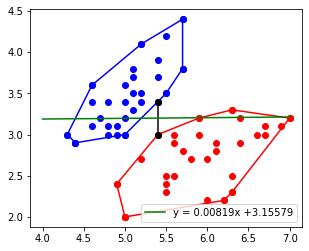

**Métricas:**

- Precisão 0.7777777777777778
- Revocação: 0.9333333333333333
- F1-Score:  0.8484848484848485

**Conclusão**

Com base no modelo e nas métricas podemos concluir que o modelo faz uma previsão razoável, mas ainda muito abaixo do ideial. Durante a implementação foi percebido que a precisão do modelo pode aumentar ou cair dependendo de quais dados são usado para o treino. Uma vez que os elementos das envoltórias são alterados, todo o modelo é alterado. 


###Implementação


**Visualizando o dataset:** iris.dat

In [ ]:
endereco_dataset = "/content/iris.dat"
pd.read_table(endereco_dataset)

,@relation iris
0,"@attribute SepalLength real [4.3, 7.9]"
1,"@attribute SepalWidth real [2.0, 4.4]"
2,"@attribute PetalLength real [1.0, 6.9]"
3,"@attribute PetalWidth real [0.1, 2.5]"
4,"@attribute Class {Iris-setosa, Iris-versicolor..."
...,...
153,"6.5, 3.0, 5.5, 1.8, Iris-virginica"
154,"7.7, 2.6, 6.9, 2.3, Iris-virginica"
155,"6.0, 2.2, 5.0, 1.5, Iris-virginica"
156,"6.9, 3.2, 5.7, 2.3, Iris-virginica"


**Criação do modelo**

Separabilidade Linear: Sucesso


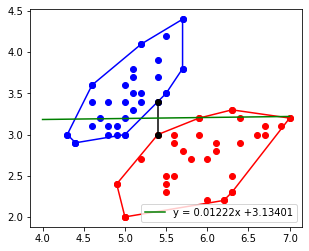

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Precisão 0.7777777777777778
Revocação: 0.9333333333333333
F1-Score:  0.8484848484848485


##Dataset Segment
É um banco de dados instâncias de informações de 7 imagens, onde cada instância possui uma classe referente a uma das 7 imagens.

Para simplificar e aplicar o classificador neste banco dados, foram usadas apenas os dois primeiros atributos, bem como apenas 2 classes.

###Relatório
O banco de dados é separável linearmente, logo podemos construir o seguinte modelo:

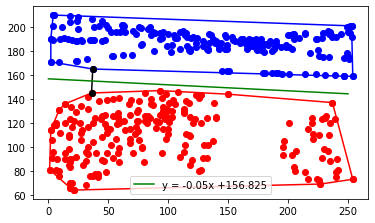

**Métricas:**

- Precisão 1.0
- Revocação: 1.0
- F1-Score:  1.0

**Conclusão**

Percebe-se que pelo modelo construído que banco de dados possui as classes muito bem separadas, ao menos pelos atributos usados. Dessa forma, todas as métricas atingiram seu ponto máximo.

###Implementação


**Visualizando o dataset:** segment.dat

In [ ]:
endereco_dataset = "/content/segment.dat"
pd.read_table(endereco_dataset)

,@relation segment
0,"@attribute Region-centroid-col real [1.0, 254.0]"
1,"@attribute Region-centroid-row real [11.0, 251.0]"
2,"@attribute Region-pixel-count real [9.0, 10.0]"
3,"@attribute Short-line-density-5 real [0.0, 0.3..."
4,"@attribute Short-line-density-2 real [0.0, 0.2..."
...,...
2328,"13.0, 83.0, 9.0, 0.0, 0.0, 0.83333325, 0.54772..."
2329,"242.0, 57.0, 9.0, 0.0, 0.0, 1.2222239, 0.78518..."
2330,"163.0, 151.0, 9.0, 0.0, 0.0, 3.833333, 11.0555..."
2331,"29.0, 184.0, 9.0, 0.0, 0.0, 1.6111107, 1.06284..."


**Criação do modelo**

Separabilidade Linear: Sucesso


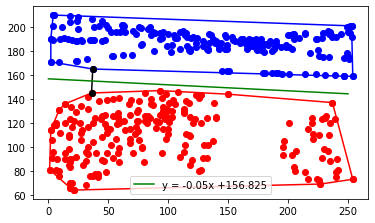

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,0,250)

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo: 
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste)
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Precisão 1.0
Revocação: 1.0
F1-Score:  1.0


## Dataset Haberman

O conjunto de dados Haberman possui uma instância de casos do hospital Billings da Universidade de Chicago entre os anos de 1958 e 1970, sobre a sobrevivência de pacientes que se submeteram a cirurgias de câncer de mama. Os pacientes são classificados em duas classes: positivo, caso sobreviveu e negativo, caso não sobreviveu.

Os atributos usados para a tentativa de construção do modelo de classificação foram idade e ano.



###Relatório
O banco de dados não é separável linearmente, logo não podemos construir o modelo de classificação. 

Segue uma visualização dos dados:

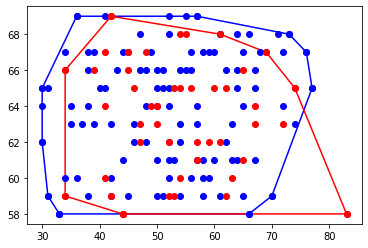

**Métricas**
- Não foi possível construir as métricas.




**Conclusão**

Ao analisar o banco de dados, vemos que os atributos idade e ano não suficientes para caracterizar aqueles que sobreviveram e não sobreviveram.

###Implementação


**Visualizando o dataset:** haberman.dat

In [ ]:
endereco_dataset = "/content/haberman.dat"
pd.read_table(endereco_dataset)

,@relation haberman
0,"@attribute Age integer [30, 83]"
1,"@attribute Year integer [58, 69]"
2,"@attribute Positive integer [0, 52]"
3,"@attribute Survival {positive, negative}"
4,"@inputs Age, Year, Positive"
...,...
308,"57, 64, 1, positive"
309,"63, 62, 0, negative"
310,"42, 61, 4, negative"
311,"43, 64, 2, negative"


**Criação do modelo**

Separabilidade Linear: Falhou


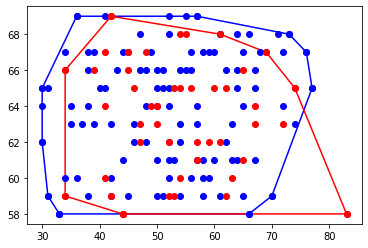

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Phoneme

Este conjunto de dados possui dados sobre sons nasais e orais, com objetivo de distingui-los. Ao construir o modelo foram usados os dois primeiros atributos e as classes 0 e 1, para representar os sons nasais e orais, respectivamente.


###Relatório
O banco de dados não é separável linearmente, mas pela forma como o classificador foi proposto, ele constrói o modelo de classificação. 

Segue uma visualização dos dados:

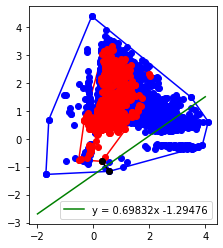

**Métricas**
- Precisão 0.3158244680851064
- Revocação: 0.9978991596638656
- F1-Score:  0.4797979797979798



**Conclusão**

Ao visualizar os dados graficamente, podemos perceber com clareza que os dados não são separáveis linearmente. No entanto, o algoritmo proposto para verificar a separabilidade consegue construir um modelo mesmo assim. Isso se deve porque o algoritmo usa a interceção entre as envoltórias para determinar a separabilidade E como podemos perceber visualmente, uma envoltória está contida na outra.

Desa forma, o modelo é construído de maneira errônea. O que pode ser verificado pelas métricas encontradas:

###Implementação


**Visualizando o dataset:** phoneme.dat

In [ ]:
endereco_dataset = "/content/phoneme.dat"
pd.read_table(endereco_dataset)

,@relation phoneme
0,"@attribute Aa real [-1.7, 4.107]"
1,"@attribute Ao real [-1.327, 4.378]"
2,"@attribute Dcl real [-1.823, 3.199]"
3,"@attribute Iy real [-1.581, 2.826]"
4,"@attribute Sh real [-1.284, 2.719]"
...,...
5408,"0.254,2.392,0.689,1.828,-0.544,0"
5409,"0.781,1.25,0.793,0.383,0.816,1"
5410,"1.031,0.584,1.866,1.532,-0.671,1"
5411,"0.15,0.933,2.363,-0.742,-0.617,0"


**Criação do modelo**

Separabilidade Linear: Sucesso


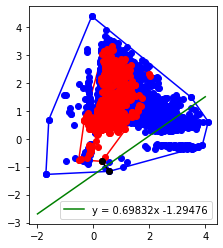

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,-2,4) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Precisão 0.3158244680851064
Revocação: 0.9978991596638656
F1-Score:  0.4797979797979798


## Dataset Saheart

Este banco de dados representa um grupo de pacientes com risco para doenças cardiacas. Os atributos representam dados corporais dos pacientes, os quais são classificados como 0 e 1, não possui doença cardícada e possui doença cardíaca, respectivamente.

Para esse experimento, foram usados os atributos pressão arterial sistólica
e o tabaco cumulativo.


###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

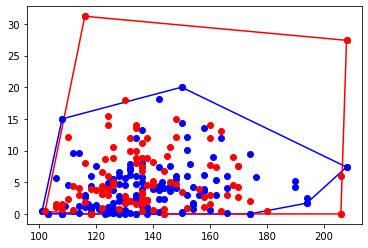

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Como não foi possível construir o modelo, conclui-se que estes dois atributos escolhidos, no mínimo, não são suficientes para classificar pacientes com doenças cardíacas. Talvez um modelo que suporte mais atributos seja possível construir o classificador.

###Implementação


**Visualizando o dataset:** saheart.dat

In [ ]:
endereco_dataset = "/content/saheart.dat"
pd.read_table(endereco_dataset)

,@relation saheart
0,"@attribute Sbp integer [101, 218]"
1,"@attribute Tobacco real [0.0, 31.2]"
2,"@attribute Ldl real [0.98, 15.33]"
3,"@attribute Adiposity real [6.74, 42.49]"
4,"@attribute Famhist {Present, Absent}"
...,...
470,"214,0.4,5.98,31.72,Absent,64,28.45,0.0,58,0"
471,"182,4.2,4.41,32.1,Absent,52,28.61,18.72,52,1"
472,"108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0"
473,"118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0"


**Criação do modelo**

Separabilidade Linear: Falhou


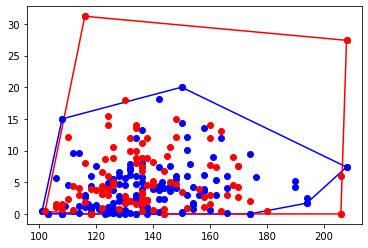

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Banana
Este dataset é um conjunto de dados artificial onde as instâncias pertencem a clusters no formato de banana. Os atributos usados foram os valores correspondentes aos eixos x e y. As classes -1 e 1 representam dois clusters em formato de banana diferentes.

###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

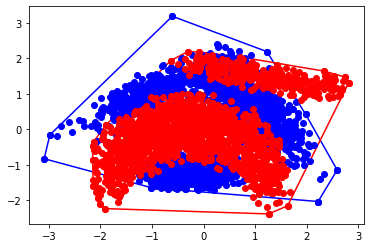

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Como não foi possível construir o modelo, conclui-se que os clusters em formato de banana não são separáveis linearmente.

###Implementação


**Visualizando o dataset:** banana.dat

In [ ]:
endereco_dataset = "/content/banana.dat"
pd.read_table(endereco_dataset)

,@relation banana
0,"@attribute At1 real[-3.09,2.81]"
1,"@attribute At2 real[-2.39,3.19]"
2,"@attribute Class {-1.0,1.0}"
3,"@inputs At1, At2"
4,@outputs Class
...,...
5301,"0.335,1.39,1.0"
5302,"-1.7,-0.569,1.0"
5303,"2.64,1.14,1.0"
5304,"0.769,0.772,-1.0"


**Criação do modelo**

Separabilidade Linear: Falhou


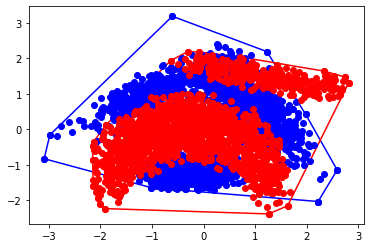

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Appendicitis

Este banco de dados representa medidas médicas tomadas em 106 pacientes. Os 7 atributos representam 7 medidas diferentes. Os dados são classificados em 1, se o paciente possui apêndicite ou 0, se o paciente não possui apêndicite.

Para construir o modelo foram usados os 2 primeiros atributos.

###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

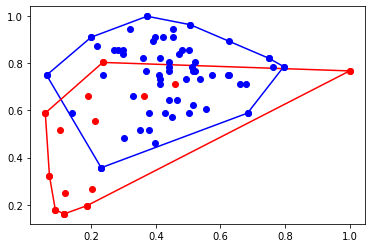

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Como não foi possível construir o modelo, conclui-se que as duas medidas médicas iniciais não são suficientes para prever se um paciente possui ou não apêndicite.

###Implementação


**Visualizando o dataset:** appendicitis.dat

In [ ]:
endereco_dataset = "/content/appendicitis.dat"
pd.read_table(endereco_dataset)

,@relation appendicitis
0,"@attribute At1 real[0.0,1.0]"
1,"@attribute At2 real[0.0,1.0]"
2,"@attribute At3 real[0.0,1.0]"
3,"@attribute At4 real[0.0,1.0]"
4,"@attribute At5 real[0.0,1.0]"
...,...
112,"0.449,0.875,0.523,0.083,0.076,0.92,0.487,0"
113,"0.102,0.0,0.022,0.0,0.0,0.0,0.017,0"
114,"0.409,0.875,0.482,0.306,0.259,0.914,0.443,0"
115,"0.427,0.804,0.474,0.056,0.048,0.836,0.437,0"


**Criação do modelo**

Separabilidade Linear: Falhou


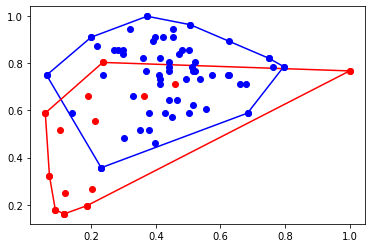

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Glass

Este banco de dados possui dados sobre vidros que podem ser encontrados na cena do crime. Com isso, classifica o tipo de vidro encontrado. Para este projeto foram usados os dois atributos iniciais, bem como apenas dois tipos de vidro para a classificação.


###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

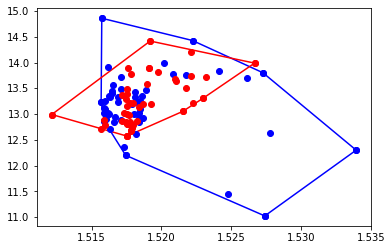

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Como não foi possível construir o modelo, conclui-se que os dois atributos escolhidos não são suficientes para prever o tipo de vidro encontrado na cena do crime.

###Implementação


**Visualizando o dataset:** glass.dat

In [ ]:
endereco_dataset = "/content/glass.dat"
pd.read_table(endereco_dataset)

,@relation glass
0,"@attribute RI real [1.51115, 1.53393]"
1,"@attribute Na real [10.73, 17.38]"
2,"@attribute Mg real [0.0, 4.49]"
3,"@attribute Al real [0.29, 3.5]"
4,"@attribute Si real [69.81, 75.41]"
...,...
222,"1.51914578, 12.73165, 1.84988, 1.85969, 72.688..."
223,"1.51916856, 14.1481, 0.0, 2.09081, 72.7388, 0...."
224,"1.51613882, 13.8821, 1.77804, 1.78907, 73.0972..."
225,"1.51509094, 15.15225, 0.0, 2.25131, 73.5004, 0..."


**Criação do modelo**

Separabilidade Linear: Falhou


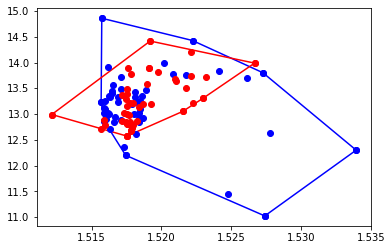

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Magic

O Conjunto de dados Magic contêm dados simulados de partículas gama de alta energia classificados como **g** e contêm dados gerados por um *extensive air showers* classificado como **h**.

O dataset possui 10 atributos. Para adequar ao classificador proposto, foi utilizado apenas 2 atributos.

###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

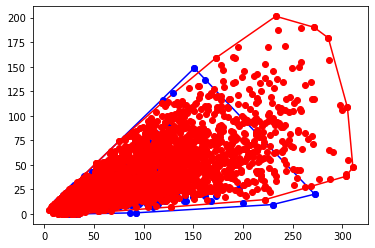

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Conclui-se que os dados, usando apenas 2 atributos, estão muito próximos uns dos outros, inviabilizando assim sua classificação usando o algoritmo proposto.

###Implementação


**Visualizando o dataset:** magic.dat

In [ ]:
endereco_dataset = "/content/magic.dat"
pd.read_table(endereco_dataset)

,@relation magic
0,"@attribute FLength real [4.2835, 334.177]"
1,"@attribute FWidth real [0.0, 256.382]"
2,"@attribute FSize real [1.9413, 5.3233]"
3,"@attribute FConc real [0.0131, 0.893]"
4,"@attribute FConc1 real [3.0E-4, 0.6752]"
...,...
19029,"21.3846,10.917,2.6161,0.5857,0.3934,15.2618,11..."
19030,"28.9452,6.702,2.2672,0.5351,0.2784,37.0816,13...."
19031,"75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,4..."
19032,"120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-..."


**Criação do modelo**

Separabilidade Linear: Falhou


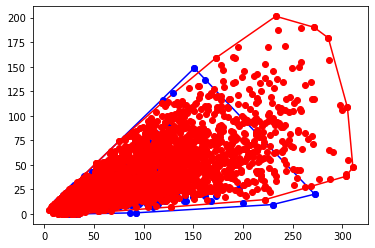

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


## Dataset Pima

Este banco de dados possui dados de pacientes com pelo menos 21 anos de ascendência indígena Pima. Os pacientes são classificados como positivo para diabetes ou negativo para diabetes.

Os dois atributos usado para a construção do modelo foram: número de vezes que ficou grávida e o resultado do teste de *Plasma glucose concentration*.



###Relatório
O banco de dados não é separável linearmente, logo não foi possível construir o modelo de classificação. 

Segue uma visualização dos dados:

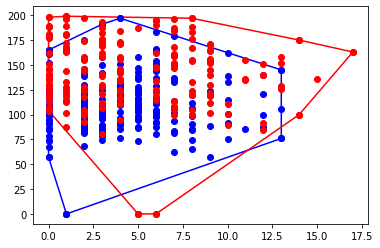

**Métricas**
- Não foi possível construir as métricas.



**Conclusão**

Conclui-se o algoritmo proposto não dispões de ferramentas o suficiente para construir um modelo de previsão para diabetes usando a quantidade de gravidas e o teste de plasma como base de dados.

###Implementação


**Visualizando o dataset:** pima.dat

In [ ]:
endereco_dataset = "/content/pima.dat"
pd.read_table(endereco_dataset)

,@relation pima
0,"@attribute Preg real [0.0, 17.0]"
1,"@attribute Plas real [0.0, 199.0]"
2,"@attribute Pres real [0.0, 122.0]"
3,"@attribute Skin real [0.0, 99.0]"
4,"@attribute Insu real [0.0, 846.0]"
...,...
775,"5,117,92,0,0,34.1,0.337,38,tested_negative"
776,"4,83,86,19,0,29.3,0.317,34,tested_negative"
777,"7,119,0,0,0,25.2,0.209,37,tested_negative"
778,"1,95,66,13,38,19.6,0.334,25,tested_negative"


**Criação do modelo**

Separabilidade Linear: Falhou


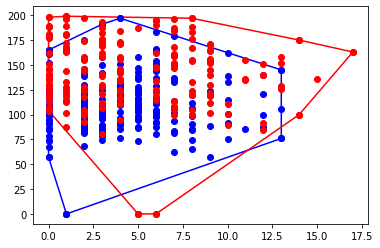

In [ ]:
reta_modelo, dfTeste, controle = Modelo(endereco_dataset,4,7) 

**Análise do classificador com base nas métricas**

In [ ]:
if reta_modelo:
  Classificador(reta_modelo,dfTeste,controle)  
  Precision(dfTeste)
  Revocacao(dfTeste)
  F1Score(dfTeste) 
else:
  print("Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.")

Não foi possível avaliar as métricas, pois os dados não são linearmente separáveis.


# Parte 8 - Conclusão

Esse trabalho tratou da implementação de um classificador supervisionado, que recebe o endereço de um dataset, computa a envoltória convexa de duas classes desse dataset, verifica se elas são linearmente separáveis e, caso sejam, propõe a separação linear como um modelo de classificação e avalia esse modelo por meio de métricas propostas. Nesse arquivo, também está a documentação deste trabalho, feito com objetivos acadêmicos, para descrevê-lo quanto à sua implementação análise de complexidade, resultados e conclusões.

O desenvolvimento deste projeto teve desafios de pelo menos 5 naturezas diferentes: Tratar os arquivos passados, de forma à poder computá-los na busca do objetivo; Entender o comportamento geométrico da envoltória para realizar os cálculos necessários para a implementação do classificador; Modularizar as funções do software, de modo à ser possível a divisão de tarefas e a eventual reautilização das funções; Procura de datasets que sejam linearmente separáveis para fazer os testes e mostrar o funcionamento completo do software; Aprender a utilizar novas bibliotecas para tratar, realizar operações e plotar os dados ques estavam sendo trabalhados.

Entre os principais ganhos com a execução deste projeto estão: A recaptulação de conceitos de orientação ao objeto; A consolidação do uso da linguagem python no histórico dos integrantes do prjeto, bem como a aquisição de novos conhecimentos em bibliotecas até então inéditas para os participantes; Aprimoramento do uso da lógica para resolver problemas inesperados e tratar bugs; Administração do tempo e da divisão de tarefas, atributo importante para quem pretende seguir na área de tecnologia da Informação.

Algoritmos classificadores podem ser muito úteis para a sociedade. Pois facilitam e otimizam o trabalho de diversos profissionais que precisam analisar e classificar grandes volumes de dados. No entanto, no caso dessa implementação podemos apresentar algumas conclusões sobre caracteríscas e limitações do modelo proposto, bem como idéias para aprimorá-lo.

Por exemplo, podemos perceber através dos experimentos que, para dados reais, é muito difícil encontrar casos linearmente separáveis. A menos de situações simples e específicas, como o banco de dados Irís. 

Percebe-se também que, para construir um modelo de classificação, é necessário mais que dois atributos. Ou seja, para a grande maioria dos casos, dois atributos não são suficientes para classificar elementos do mundo real.

Assim, juntando a dificuldade de encontrar dados linearmente separáveis e a falta de informações para classificar, conclui-se que foi projetado um algoritmo classificador muito específico. Ou seja, funciona de maneira eficiente apenas para casos particulares, o que, para o objetivo acadêmico do qual esse projeto se trata, é o suficiente, mas que poderia ser incrementado.

Após discussões entre o grupo, entendemos diversas possíveis alterações para aumentar a precisão do algoritmo, bem como torná-lo mais geral. Entre as melhorias propostas, entendemos que para aumentar a precisão, podemos encontrar o ponto central das envoltórias convexas e a partir desses dois pontos, contruir o modelo usando a reta perpendicular a ambos. Outro incremento possível, para generalizar o projeto para aceitar mais atributos, seria implementar um algoritmo de envoltoria convexa que suporte dados em n-dimensões.

#References



VIMIEIRO, Renato. Slide Introdução a Geometria Computacional (2022). Disciplina Algoritmos 2 DCC207 UFMG.

Pandas Documentation. Disponível em https://pandas.pydata.org/docs/. Acessado em 10/10/2022.

Matplotlib Documentation. Disponível em https://matplotlib.org/. Acessado em 15/10/2022.

